# Logistic Regression from Scratch

### Review: Linear Regression from Scratch

Note: This is the fundamental of deep learning.  Almost all deep learning operations is based on this weight multiplication.

Solving linear regression is an **optimization** problem. Optimization means finding the optimal - max, min.

$$\theta^* = \argmin_\theta J(\theta)$$

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = \mathbf{X} \cdot \theta$$

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{\mathbf{y}}^{(i)} - \mathbf{y}^{(i)})^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{\mathbf{y}}^{(i)} - \mathbf{y}^{(i)})\mathbf{x}_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)
    

### Let's come back to Logistic Regression

Note: this is also the fundamental of all deep learning, that involves classification.   In deep learning, all operations do something like this....

Logistic Regression is a **classification** algorithm based on linear regression.

Classification - supervised learning - where $y$ is discrete.

Binary - class 0 and 1
Multiclass - > 2 class

Today we will be doing binary.....
This Thurs we will be doing multiclass....

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = X \cdot \theta$$

    We know that $\texttt{range}(X \cdot \theta) =  (-\infty, \infty)$

    We need to find a function $g(x)$ such that it maps infinity to 0 and 1.

    That $g(x) = \displaystyle\frac{1}{1 + e^{-x}}$

    So if you combine $g(x)$ with $h(\theta)$, then you will get
    
    $h(g(x)) = \displaystyle\frac{1}{1 + e^{-(X \cdot \theta)}}$


2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        Note: 
        - the behavior of J is that when y, yhat= (1,1) | (0, 0) , then J = 0
        - the behavior of J is that when y, yhat= (0,1) | (1, 0) , then J = very high


    $$J(\theta) = \sum_{i=0}^m -( \mathbf{y}^{(i)} * \log{\mathbf{h}}^{(i)} + (1 - \mathbf{y}^{(i)})\log(1 - {\mathbf{h}}^{(i)}))$$
             

    2.2 $$\frac{\partial J}{\partial \theta_j} = \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y})$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

### Let's code

In [4]:
import numpy as np
import matplotlib.pyplot as plt

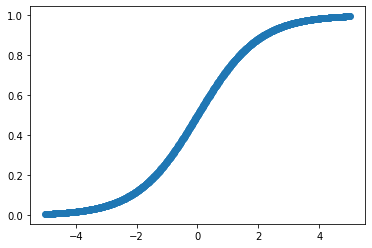

In [7]:
#1. I want you to define this function g(x)
def sigmoid(x):  #logit function, or sigmoid function
    return (1 + np.exp(-x)) ** -1

#2. I want you to simulate x from -5 to 5
x = np.linspace(-5, 5, 1000)  #np.arange(-5, 5, 0.01)
y = sigmoid(x)

#3. Try to plot it
plt.scatter(x, y)


In [16]:
#1. define X with two samples.  
# Sample 1 has egg price = 5, oil price = 10; Sample 2 has egg price = 3, oil price = 4
X = np.array([[5, 10], [3, 4], [9, 1]])
X.shape

#2. define any theta you like
theta = np.random.random((2, ))  #np.ones((X.shape[1], ))
theta.shape

#3. perform X dot theta  #(3, 2) @ (2, ) = (3, )
    #print it
yhat = X.dot(theta)
yhat.shape
    
#4. perform sigmoid on top and see whether the value is really 0 or 1
yhat_sig = sigmoid(yhat)

#5. perform a round to nearest
print(np.round(yhat_sig))

[1. 1. 1.]


$$\mathbf{J}(\theta) = \sum_{i=0}^m -( \mathbf{y}^{(i)} * \log{\mathbf{h}}^{(i)} + (1 - \mathbf{y}^{(i)})\log(1 - {\mathbf{h}}^{(i)}))$$

Good 19.84779709959251
Bad 0.31844724673955827


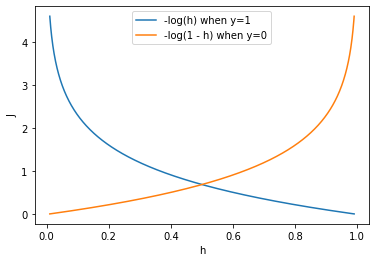

In [24]:
#1. Please code this loss function above.
#h = f(x) = yhat
def binary_cross_entropy(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y)*np.log(1 - yhat))

#1.1 Please plot -np.log(h) and -np.log(1 - h), 
# where h is a value between 0.01 to 0.99
h = np.linspace(0.01, 0.99, 1000)
plt.plot(h, -np.log(h),     label="-log(h) when y=1")
plt.plot(h, -np.log(1 - h), label="-log(1 - h) when y=0")
plt.xlabel('h')
plt.ylabel('J')
plt.legend()

#2.1 simulate the actual y
y = np.array([0, 1, 1, 0, 1])

#2.2 simulate a very bad yhat - no good predictions
bad_yhat = np.array([0.88, 0.01, 0.02, 0.99, 0.01])

#2.3 simulate a very good yhat - very good predictions
good_yhat = np.array([0.01, 0.98, 0.92, 0.03, 0.84])

#3. try to get J(\theta) of actual y vs. (1)very bad, (2)very good
print("Good", binary_cross_entropy(y, bad_yhat))
print("Bad", binary_cross_entropy(y, good_yhat))


In [ ]:
#1. Load breast cancer from sklearn

#2. Set the X and y, split properly, standardize properly

#3. Create a class of Logistic Regression (no need mini-batch, sto, or cross validation)

#4. fit, and predict

#Later....5. I will teach recall, precision, accuracy